In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [2]:
!pip install ultralytics
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 4.6 MB/s eta 0:00:00a 0:00:01


# import libraries 

In [3]:
import supervision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import os
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# load data

In [4]:
class CFG:
    EPOCHS = 30
    BATCH_SIZE = 32
    SEED = 6
    LEARNING_RATE = 0.001
    NUM_SAMPLES = 16
    OPTIMIZER = 'Adam'
    DATA_PATH = '/kaggle/input/blood-dataa/data.yaml'
    SAMPLE_PATH = '/kaggle/input/blood-dataa/test/images/*'

# sample image

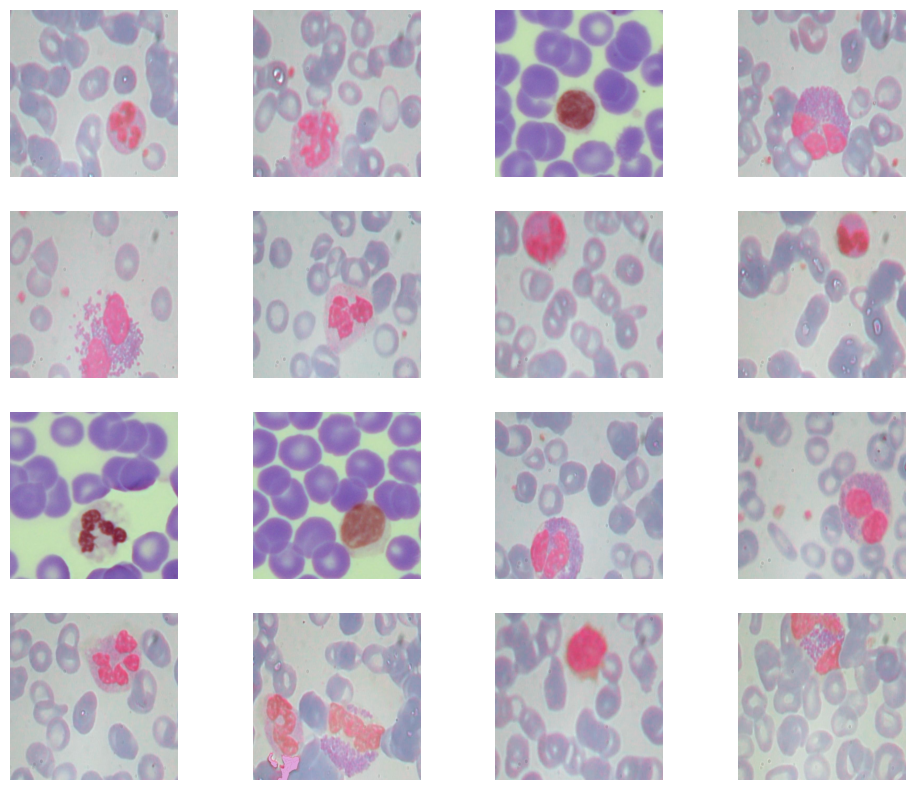

In [5]:
images_data = glob(CFG.SAMPLE_PATH)
random_image = random.sample(images_data, CFG.NUM_SAMPLES)

plt.figure(figsize=(12,10))
for i in range(CFG.NUM_SAMPLES):
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

# load weight

In [6]:
yolo_v10 = YOLO('yolov10n.pt')


100%|██████████| 5.59M/5.59M [00:00<00:00, 78.2MB/s]


# model training 

In [7]:
v10_model = yolo_v10.train(data=CFG.DATA_PATH,seed=CFG.SEED,epochs=CFG.EPOCHS, lr0=CFG.LEARNING_RATE, optimizer=CFG.OPTIMIZER, verbose=True,
    project='ft_models',  
    name='yolo_v10')

Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/kaggle/input/blood-dataa/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=ft_models, name=yolo_v10, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/blood-dataa/train/labels... 966 images, 0 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:02<00:00, 361.69it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/blood-dataa/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/blood-dataa/valid/labels... 94 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<00:00, 256.93it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/blood-dataa/valid is not writeable, cache not saved.


Plotting labels to ft_models/yolo_v10/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ft_models/yolo_v10
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.47G      2.463       3.43       2.53        180        640: 100%|██████████| 61/61 [00:16<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         94       1781     0.0183      0.319     0.0647     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.47G      2.335      2.065      2.423        162        640: 100%|██████████| 61/61 [00:13<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         94       1781      0.798      0.318      0.608       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.47G      2.316      1.892      2.428        214        640: 100%|██████████| 61/61 [00:14<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         94       1781      0.639      0.657      0.706      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.47G      2.323      1.804      2.426        194        640: 100%|██████████| 61/61 [00:13<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         94       1781      0.685      0.805      0.771      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.47G      2.239      1.724      2.391        141        640: 100%|██████████| 61/61 [00:14<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         94       1781      0.705      0.747      0.778      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.47G      2.226      1.636      2.384        140        640: 100%|██████████| 61/61 [00:14<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         94       1781      0.745       0.76      0.814      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.47G      2.226      1.616      2.407        191        640: 100%|██████████| 61/61 [00:14<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         94       1781      0.735      0.784      0.803      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.47G       2.22      1.573      2.392        143        640: 100%|██████████| 61/61 [00:14<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         94       1781      0.745      0.832      0.831      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.47G      2.145      1.526      2.365        220        640: 100%|██████████| 61/61 [00:14<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         94       1781      0.709       0.76      0.766      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.47G      2.177      1.515      2.369        174        640: 100%|██████████| 61/61 [00:14<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         94       1781      0.726       0.79      0.815      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.47G      2.157      1.505      2.387        107        640: 100%|██████████| 61/61 [00:14<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         94       1781      0.761       0.84      0.822      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.47G      2.121      1.445      2.355        164        640: 100%|██████████| 61/61 [00:14<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         94       1781      0.819      0.799      0.844      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.47G      2.095      1.425      2.352        144        640: 100%|██████████| 61/61 [00:14<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         94       1781      0.767      0.841      0.819      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.47G      2.087      1.413      2.347        225        640: 100%|██████████| 61/61 [00:14<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         94       1781      0.825      0.825      0.847      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.47G      2.055      1.371      2.339        162        640: 100%|██████████| 61/61 [00:14<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         94       1781      0.794      0.828      0.841      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.47G      2.066      1.377      2.349        181        640: 100%|██████████| 61/61 [00:14<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         94       1781      0.783      0.818      0.845      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.47G      2.028      1.316      2.311        133        640: 100%|██████████| 61/61 [00:14<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         94       1781      0.781      0.805      0.828      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.47G      2.032      1.318      2.314        164        640: 100%|██████████| 61/61 [00:14<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         94       1781      0.771      0.856      0.829      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.47G      2.002      1.306       2.31        185        640: 100%|██████████| 61/61 [00:14<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         94       1781      0.835      0.802      0.839      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.47G      1.979      1.297      2.303        167        640: 100%|██████████| 61/61 [00:14<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         94       1781      0.812      0.822      0.853      0.551


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.47G      1.943      1.248      2.343        112        640: 100%|██████████| 61/61 [00:14<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         94       1781      0.804       0.84      0.845       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.47G      1.894      1.177       2.32         94        640: 100%|██████████| 61/61 [00:13<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         94       1781      0.815      0.799      0.848      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.47G      1.873      1.135      2.302        119        640: 100%|██████████| 61/61 [00:13<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         94       1781      0.809      0.844      0.843      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.47G      1.839      1.097      2.278        107        640: 100%|██████████| 61/61 [00:13<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         94       1781      0.835      0.833      0.865       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.47G      1.828      1.086      2.266        106        640: 100%|██████████| 61/61 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         94       1781       0.84      0.858      0.871      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.47G      1.813       1.07      2.277        113        640: 100%|██████████| 61/61 [00:13<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         94       1781      0.848      0.825      0.861      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.47G      1.754      1.039      2.235         98        640: 100%|██████████| 61/61 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         94       1781      0.807      0.846      0.842      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.47G      1.743      1.036      2.224        130        640: 100%|██████████| 61/61 [00:13<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         94       1781      0.813      0.869       0.86       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.47G      1.711      1.001      2.198        100        640: 100%|██████████| 61/61 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         94       1781      0.823      0.852      0.867      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.47G      1.691     0.9966      2.193         88        640: 100%|██████████| 61/61 [00:13<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         94       1781      0.839      0.845      0.866      0.554



30 epochs completed in 0.136 hours.
Optimizer stripped from ft_models/yolo_v10/weights/last.pt, 5.7MB
Optimizer stripped from ft_models/yolo_v10/weights/best.pt, 5.7MB

Validating ft_models/yolo_v10/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 125 layers, 2,695,586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]


                   all         94       1781      0.821       0.85      0.867      0.558
                   RBC         94       1617      0.835      0.846      0.895      0.649
                   WBC         92         95      0.942      0.979      0.975      0.616
             platelets         42         69      0.686      0.725       0.73      0.411
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to ft_models/yolo_v10


# model testing

In [8]:

def bloodcell(img_path, model):
    # Read the image
    img = cv2.imread(img_path)
    # Pass the image through the detection model and get the result
    detect_result = model(img)
    # Plot the detections
    detect_img = detect_result[0].plot()
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img


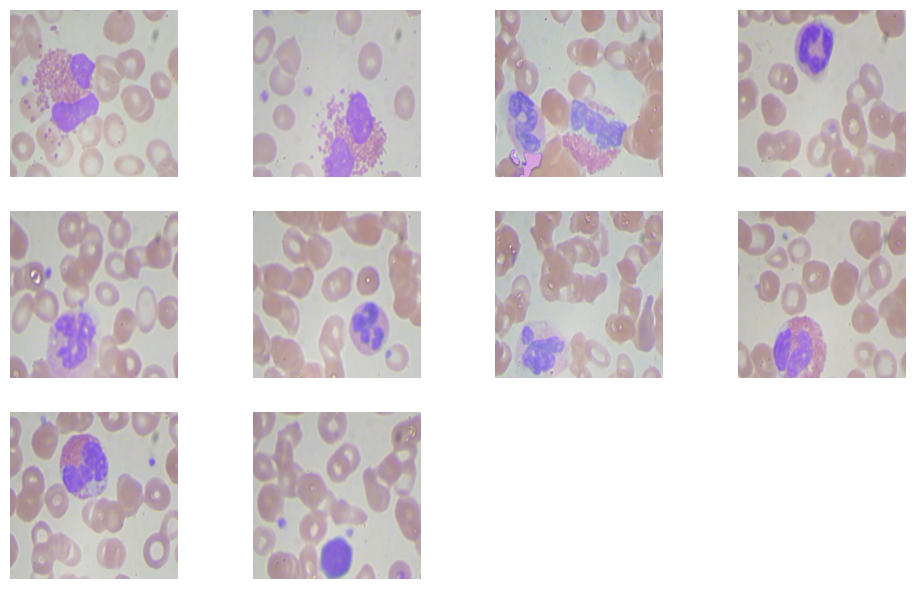

In [9]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/blood-dataa/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)
# Number of images to select
num_samples = 10
# Ensure there are enough images to sample from
if len(image_files) < num_samples:
    print(f"Warning: Requested {num_samples} samples, but only found {len(image_files)} images.")
    num_samples = len(image_files)
# Select random images from the list
selected_images = random.sample(image_files, num_samples)

plt.figure(figsize=(12, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    image_path = os.path.join(custom_image_dir, selected_images[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image to RGB
    plt.imshow(image)
    plt.axis('off')
plt.show()



0: 640x640 24 RBCs, 1 WBC, 1 platelets, 9.2ms
Speed: 2.2ms preprocess, 9.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 RBCs, 2 WBCs, 4 plateletss, 11.1ms
Speed: 3.2ms preprocess, 11.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 22 RBCs, 3 WBCs, 13.2ms
Speed: 3.6ms preprocess, 13.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 21 RBCs, 1 WBC, 1 platelets, 10.4ms
Speed: 3.8ms preprocess, 10.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 25 RBCs, 1 WBC, 1 platelets, 10.2ms
Speed: 3.1ms preprocess, 10.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 RBCs, 1 WBC, 10.4ms
Speed: 3.1ms preprocess, 10.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 29 RBCs, 1 WBC, 10.6ms
Speed: 3.1ms preprocess, 10.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 22 RBCs, 1 

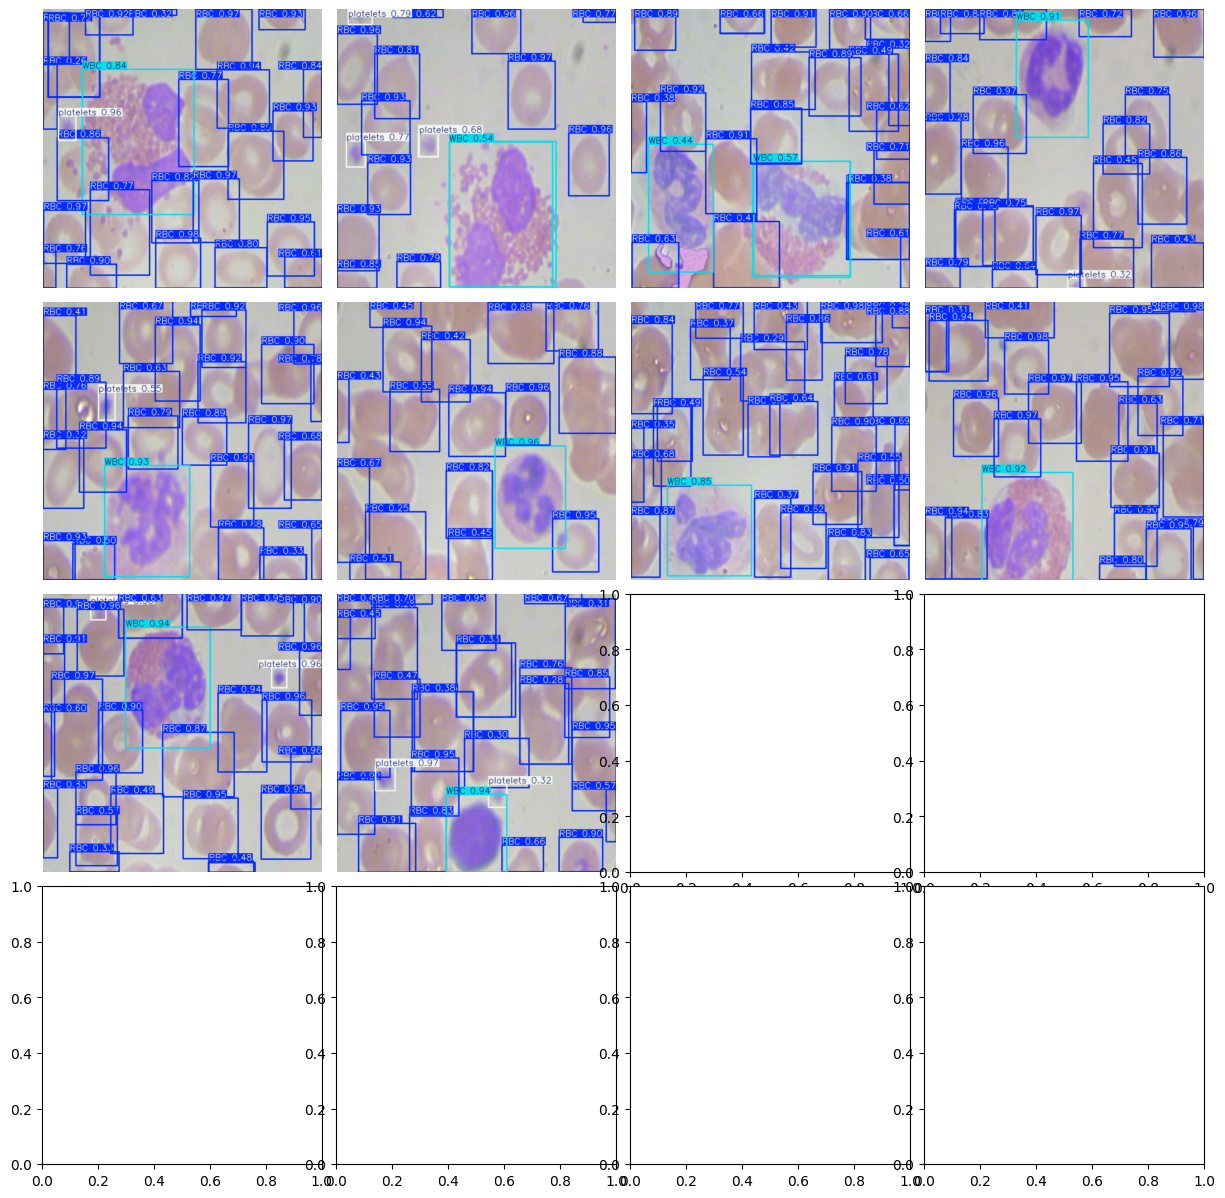

In [10]:
v10_trained = YOLO('/kaggle/working/ft_models/yolo_v10/weights/best.pt')
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = bloodcell(img_path, v10_trained)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# result

In [11]:
v10_result = pd.read_csv('/kaggle/working/ft_models/yolo_v10/results.csv')
v10_result.head()

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   50.7266         2.46342         3.42952         2.53038   
1      2   65.7553         2.33488         2.06515         2.42312   
2      3   80.9300         2.31645         1.89215         2.42793   
3      4   96.0061         2.32320         1.80447         2.42591   
4      5  111.1440         2.23855         1.72438         2.39109   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.01827            0.31870           0.06469   
1               0.79756            0.31799           0.60844   
2               0.63919            0.65733           0.70571   
3               0.68480            0.80533           0.77139   
4               0.70548            0.74686           0.77822   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.04254       2.53121       4.65611       2.78637  0.067541   
1              0.36984       2.41891       2.44301       2.59929  0.034519   
2              0.40785       2.41813       2.15134       2.65924  0.001475   
3              0.47582       2.34639       1.66269       2.62692  0.000901   
4              0.48411       2.28541       1.60621       2.63756  0.000868   

     lr/pg1    lr/pg2  
0  0.000328  0.000328  
1  0.000639  0.000639  
2  0.000929  0.000929  
3  0.000901  0.000901  
4  0.000868  0.000868

# visualization

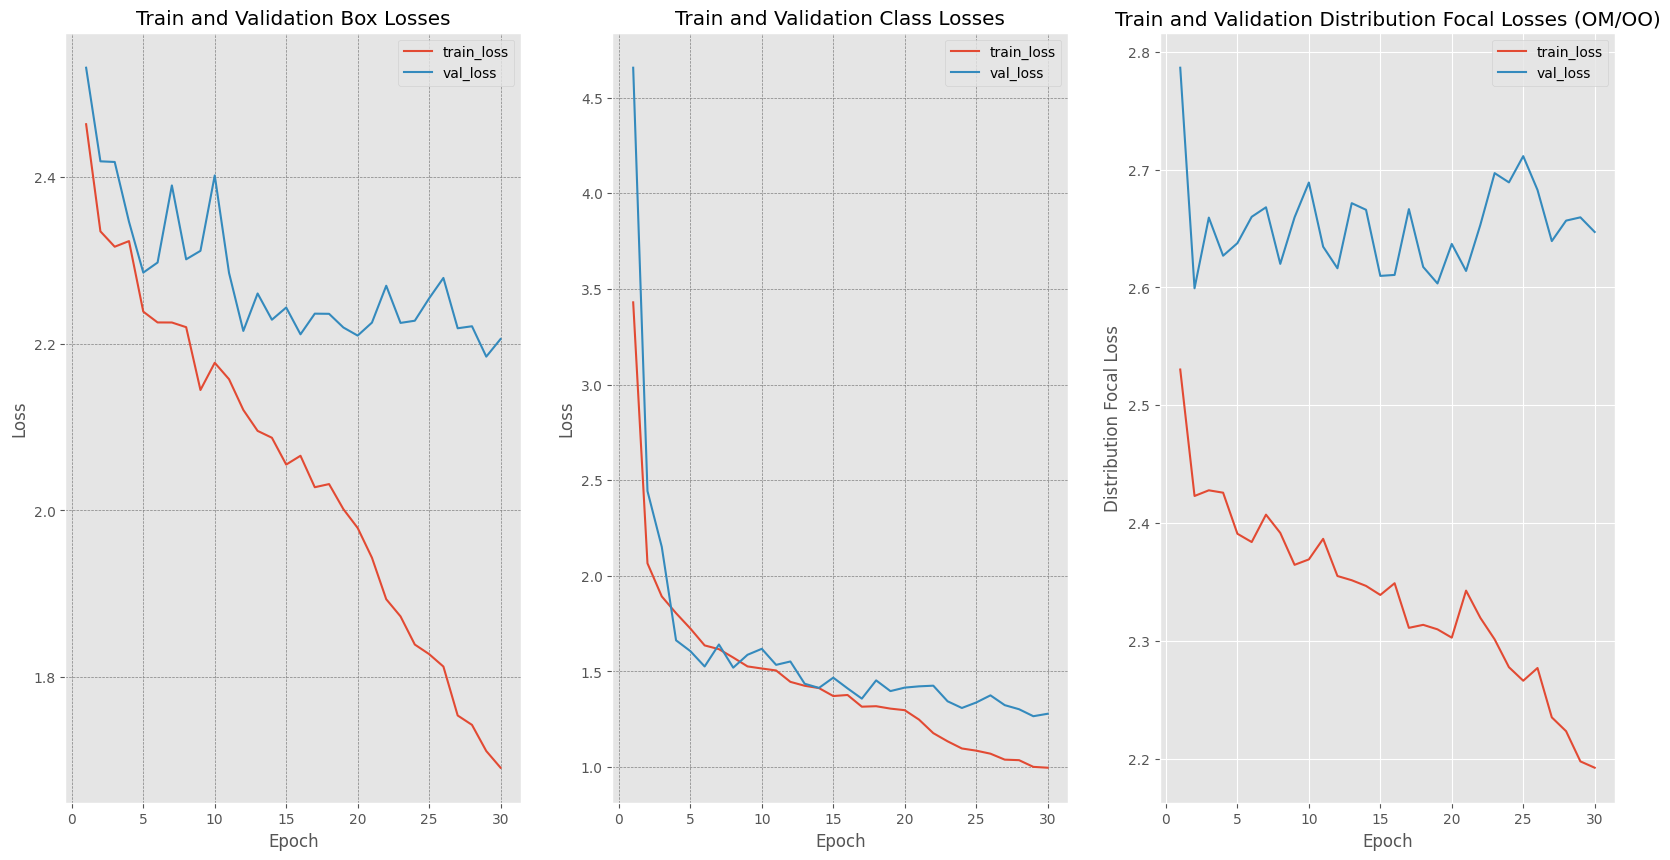

In [12]:
def show_v10_graphs(result):    
    result.columns = result.columns.str.strip()

    epoch_column = result['epoch']
    box_train_losses = result['train/box_loss']
    box_val_losses = result['val/box_loss']
    cls_train_losses = result['train/cls_loss']
    cls_val_losses = result['val/cls_loss']
    dfl_train_losses = result['train/dfl_loss']
    dfl_val_losses = result['val/dfl_loss']

    plt.figure(figsize=(20,10))
    plt.style.use('ggplot')  
    plt.subplot(1,3,1)
    plt.plot(epoch_column, box_train_losses, label='train_loss')
    plt.plot(epoch_column, box_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Box Losses')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(epoch_column, cls_train_losses, label='train_loss')
    plt.plot(epoch_column, cls_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Class Losses')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(epoch_column, dfl_train_losses, label='train_loss')
    plt.plot(epoch_column, dfl_val_losses, label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Distribution Focal Loss')
    plt.title('Train and Validation Distribution Focal Losses (OM/OO)')
    plt.legend()
    plt.show()
show_v10_graphs(v10_result)    

# user prediction


0: 640x640 18 RBCs, 1 WBC, 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


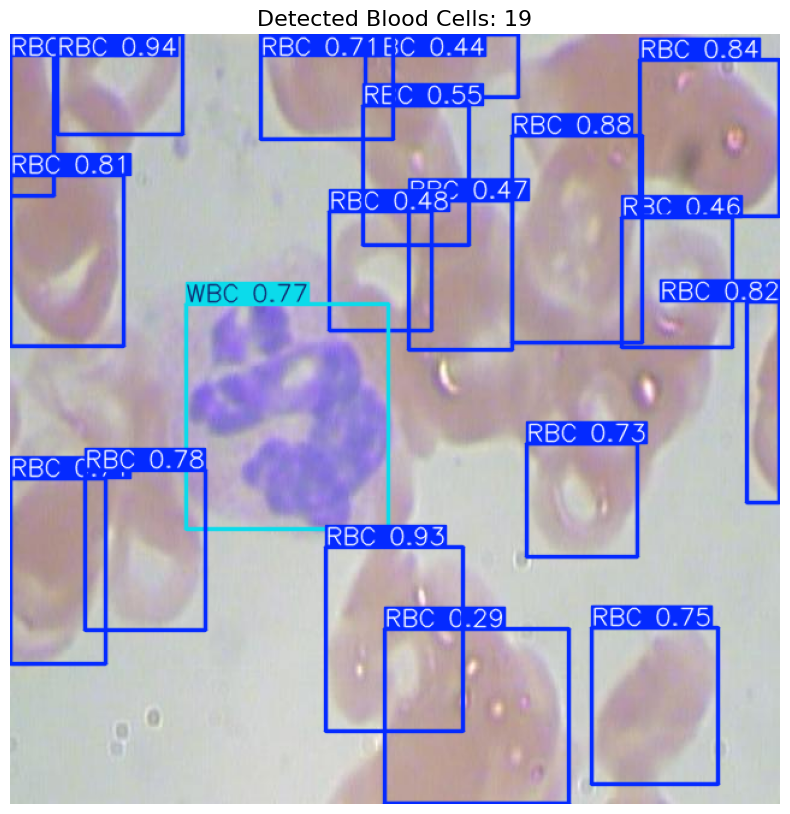

Total number of detected blood cells: 19


In [15]:
import supervision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
import os

# Ignore warnings and disable WANDB
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

# Function to perform detections and count blood cells
def fire(img_path, model):
    # Read the image
    img = cv2.imread(img_path)
    
    # Pass the image through the detection model and get the result
    results = model(img)
    
    # Get the number of detections (bounding boxes)
    num_blood_cells = len(results[0].boxes)

    # Plot the detections on the image
    detect_img = results[0].plot()

    # Convert image to RGB format for displaying
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img, num_blood_cells

# Load the trained YOLOv10 model
model_path = '/kaggle/working/ft_models/yolo_v10/weights/best.pt'
v10_trained = YOLO(model_path)

# Function to display detection result and blood cell count
def display_detection(img_path, model):
    detect_img, count = fire(img_path, model)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(detect_img)
    plt.axis('off')
    plt.title(f'Detected Blood Cells: {count}', fontsize=16)
    plt.show()
    
    # Print count separately too
    print(f"Total number of detected blood cells: {count}")

# Path to user's image
user_image_path = r'/kaggle/input/blood-dataa/valid/images/BloodImage_00004_jpg.rf.4b9c9c5ec6517d1b521e5ff7ab44d2dc.jpg'

# Display detection and count
display_detection(user_image_path, v10_trained)



0: 640x640 29 RBCs, 1 WBC, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


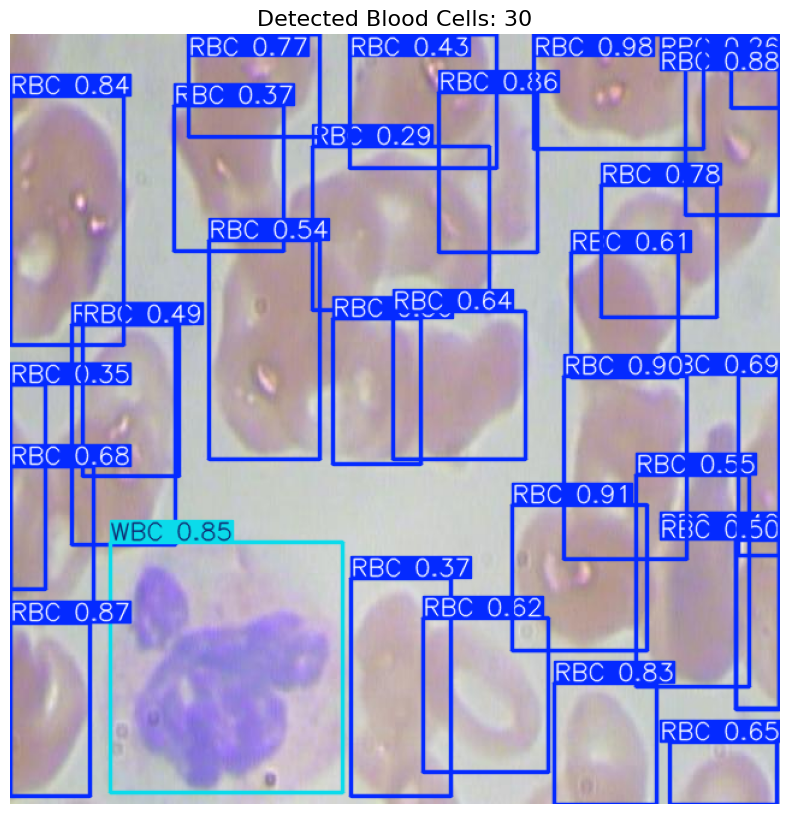

Total number of detected blood cells: 30


In [14]:
import supervision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
import os

# Ignore warnings and disable WANDB
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

# Function to perform detections and count blood cells
def fire(img_path, model):
    # Read the image
    img = cv2.imread(img_path)
    
    # Pass the image through the detection model and get the result
    results = model(img)
    
    # Get the number of detections (bounding boxes)
    num_blood_cells = len(results[0].boxes)

    # Plot the detections on the image
    detect_img = results[0].plot()

    # Convert image to RGB format for displaying
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img, num_blood_cells

# Load the trained YOLOv10 model
model_path = '/kaggle/working/ft_models/yolo_v10/weights/best.pt'
v10_trained = YOLO(model_path)

# Function to display detection result and blood cell count
def display_detection(img_path, model):
    detect_img, count = fire(img_path, model)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(detect_img)
    plt.axis('off')
    plt.title(f'Detected Blood Cells: {count}', fontsize=16)
    plt.show()
    
    # Print count separately too
    print(f"Total number of detected blood cells: {count}")

# Path to user's image
user_image_path = r'/kaggle/input/blood-dataa/test/images/BloodImage_00001_jpg.rf.0173b591d5c9adacc767fab3ab78af64.jpg'

# Display detection and count
display_detection(user_image_path, v10_trained)
